In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('new_df.csv')
df.head()

,x1,x2,y
0,-1.522577,1.524929,1
1,-1.279162,1.309304,1
2,-1.668049,1.421862,1
3,-1.460409,1.352101,1
4,-1.522577,1.524929,1


## I already did Data preprocessing and now data is standardized and data is ready to go in ML model, you can check preprocessing steps in Data Preprocessing jupyter notebook

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop('y',axis=1)
y = df.y

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [8]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [9]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = clf.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score

In [14]:
accuracy_score(y_test,y_pred)

0.9245960502692998

In [15]:
confusion_matrix(y_test,y_pred)

array([[275,  20],
       [ 22, 240]])

In [16]:
recall_score(y_test,y_pred)

0.916030534351145

In [17]:
precision_score(y_test,y_pred)

0.9230769230769231

In [20]:
f1_score(y_test,y_pred)

0.9195402298850576

In [21]:
x_train.columns

Index(['x1', 'x2'], dtype='object')

In [22]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [23]:
feature_name = list(x_train.columns)
dot_data = export_graphviz(clf,feature_names=feature_name,rounded=True,filled=True)
grpah = pydotplus.graph_from_dot_data(dot_data)

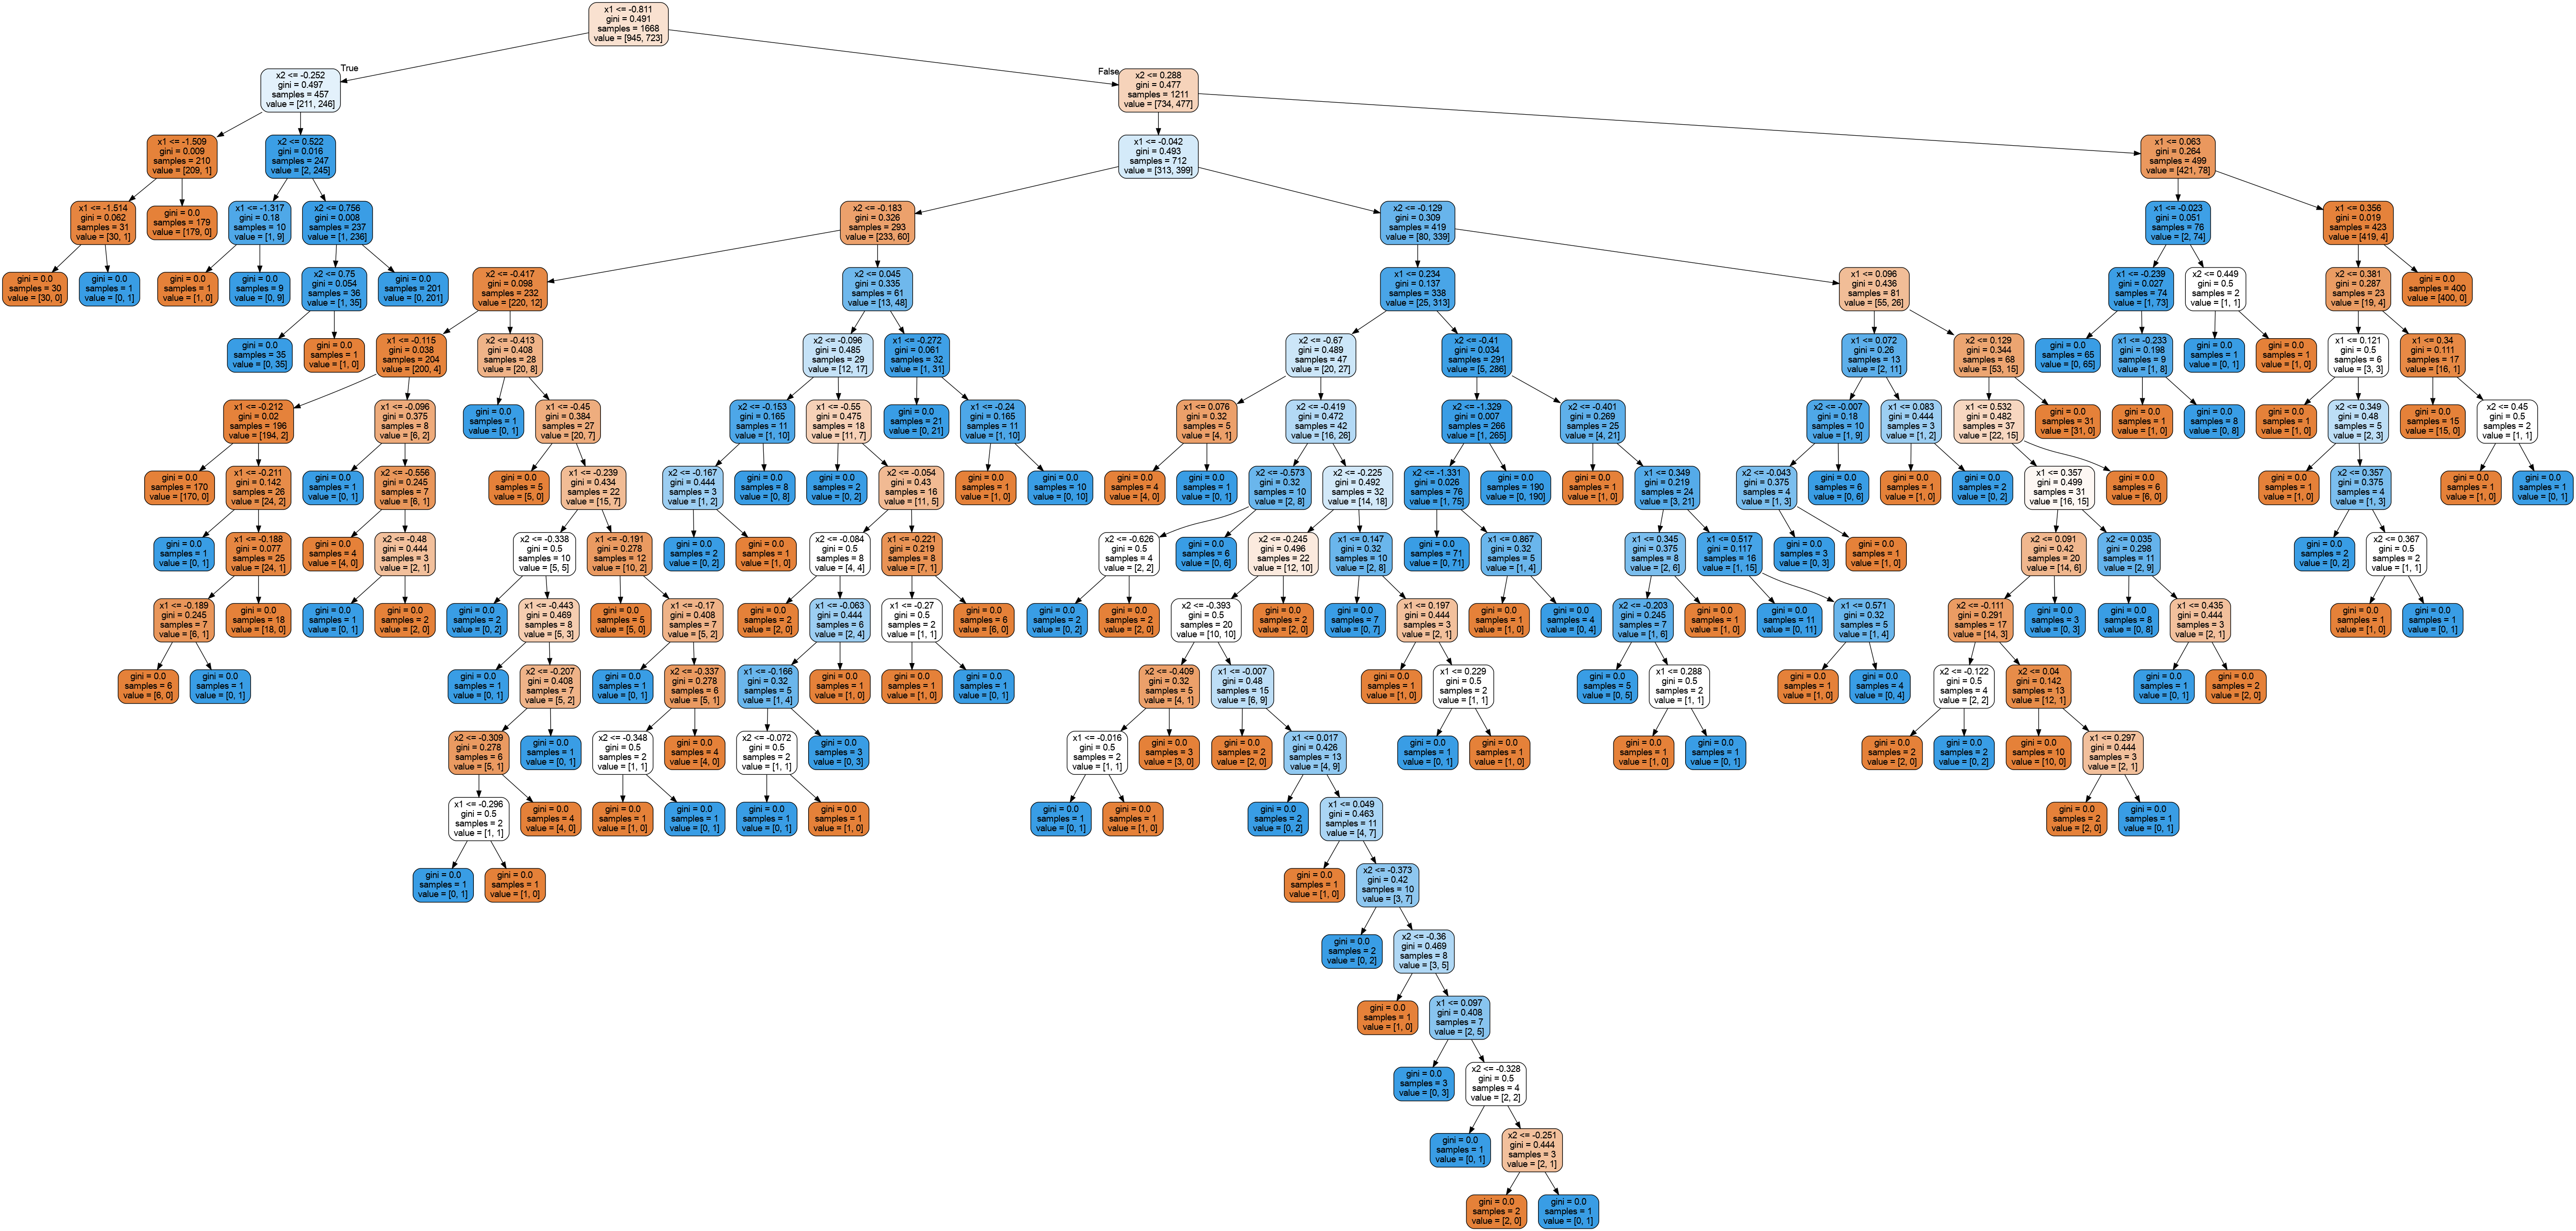

In [24]:

Image(grpah.create_png())

## Hypeparameter Tuning

In [19]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [25]:
params = {
    'criterion':['entropy','gini'],
    'splitter' : ["best", "random"],
    'max_depth':range(2,10,1),
    'min_samples_split':range(2,5,1),
    'min_samples_leaf':range(2,5,1),
    'max_leaf_nodes':[1,2,3,4]
}

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
random_search = RandomizedSearchCV(estimator=clf,param_distributions=params,cv=5,n_jobs=-1,verbose=1)

In [28]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/ronak/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.73744763        nan        nan 0.58512165 0.73744763 0.62467857
        nan 0.71820323 0.73744763 0.58512165]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(2, 10),
                                        'max_leaf_nodes': [1, 2, 3, 4],
                                        'min_samples_leaf': range(2, 5),
                                        'min_samples_split': range(2, 5),
                                        'splitter': ['best', 'random']},
                   verbose=1)

In [29]:
random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 4,
 'max_depth': 4,
 'criterion': 'gini'}

In [30]:
best_clf = random_search.best_estimator_
best_clf

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4, min_samples_leaf=3,
                       min_samples_split=3)

In [31]:
y_pred_new = best_clf.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred_new)

0.7504488330341114

In [35]:
confusion_matrix(y_test,y_pred_new)

array([[191, 104],
       [ 35, 227]])